In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import community.community_louvain as community_louvain  # Explicit import to avoid conflicts
from collections import defaultdict
import random
import os
import random
from collections import defaultdict, Counter
from community import community_louvain
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [12]:
import networkx as nx
from collections import defaultdict
import random
from community import community_louvain  # Install via `pip install python-louvain`

# Define the path to the GEXF file
file_path = r'./../networks/One_Piece.gexf'  # Replace with the actual path to your file

# Load the graph from the GEXF file
G = nx.read_gexf(file_path)

# Set random seed for reproducibility
random.seed(42)

# Perform Louvain community detection
louvain_partition = community_louvain.best_partition(G, resolution=1)

# Group nodes by their community
communities_louvain = defaultdict(list)
for node, community in louvain_partition.items():
    communities_louvain[community].append(node)

# Sort communities by the size (number of nodes) in descending order
sorted_communities = sorted(communities_louvain.items(), key=lambda x: len(x[1]), reverse=True)

# Output the results
print(f"Number of Communities: {len(sorted_communities)}")
print("Communities sorted by size:")
for i, (community_id, nodes) in enumerate(sorted_communities, 1):
    print(f"- Community {i} (ID: {community_id}): {len(nodes)} nodes")

Number of Communities: 24
Communities sorted by size:
- Community 1 (ID: 3): 106 nodes
- Community 2 (ID: 10): 98 nodes
- Community 3 (ID: 7): 85 nodes
- Community 4 (ID: 1): 68 nodes
- Community 5 (ID: 4): 63 nodes
- Community 6 (ID: 6): 63 nodes
- Community 7 (ID: 9): 56 nodes
- Community 8 (ID: 5): 46 nodes
- Community 9 (ID: 13): 15 nodes
- Community 10 (ID: 0): 13 nodes
- Community 11 (ID: 14): 6 nodes
- Community 12 (ID: 16): 6 nodes
- Community 13 (ID: 17): 2 nodes
- Community 14 (ID: 18): 2 nodes
- Community 15 (ID: 11): 1 nodes
- Community 16 (ID: 15): 1 nodes
- Community 17 (ID: 19): 1 nodes
- Community 18 (ID: 20): 1 nodes
- Community 19 (ID: 21): 1 nodes
- Community 20 (ID: 22): 1 nodes
- Community 21 (ID: 23): 1 nodes
- Community 22 (ID: 8): 1 nodes
- Community 23 (ID: 2): 1 nodes
- Community 24 (ID: 12): 1 nodes


In [13]:
import json

# Load the filtered_summary json file
filtered_summary = r'./../json_files/filtered_summary.json'
with open(filtered_summary, 'r') as f:
    data = json.load(f)

# Assuming you have a list of communities (sorted_communities)
# where each community is a tuple of (community_id, nodes)
for community_id, nodes in sorted_communities:
    if len(nodes) < 6:

        print(f"\nCommunity {community_id}")

        # Print character information, focusing on mention_intersection
        for character in nodes:
            print(f"Character: {character}")
            print(f"Mention Intersection: {data[character]['mention_intersection']}")
            print()
    


Community 17
Character: Fillonce
Mention Intersection: ['Ishilly']

Character: Ishilly
Mention Intersection: ['Fillonce']


Community 18
Character: Furrari
Mention Intersection: ['Jeep']

Character: Jeep
Mention Intersection: ['Furrari']


Community 11
Character: Arthur
Mention Intersection: []


Community 15
Character: Charlotte Newshi
Mention Intersection: []


Community 19
Character: Kobe
Mention Intersection: []


Community 20
Character: Kotatsu
Mention Intersection: []


Community 21
Character: Kunyun
Mention Intersection: []


Community 22
Character: Moda
Mention Intersection: []


Community 23
Character: Nokokuwa Police
Mention Intersection: []


Community 8
Character: Pandaman
Mention Intersection: []


Community 2
Character: Seki
Mention Intersection: []


Community 12
Character: Tama
Mention Intersection: []



In [14]:
import json

# Load the filtered_summary json file
filtered_summary = r'./../json_files/filtered_summary.json'
with open(filtered_summary, 'r') as f:
    data = json.load(f)

# Assuming you have a list of communities (sorted_communities)
# where each community is a tuple of (community_id, nodes)
for community_id, nodes in sorted_communities:
    if len(nodes) < 6:

        print(f"\nCommunity {community_id}")

        # Print character information, focusing on mention_intersection
        for character in nodes:
            print(f"Character: {character}")
            print(f"Mention Intersection: {data[character]}")
            print()
    


Community 17
Character: Fillonce
Mention Intersection: {'mentions': ['Camie', 'Caribou', 'Hammond', 'Ishilly', 'Jinbe', 'Monkey D. Luffy', 'Sanji'], 'word_count': 538, 'mentioned_by': ['Ishilly'], 'mention_intersection': ['Ishilly']}

Character: Ishilly
Mention Intersection: {'mentions': ['Camie', 'Caribou', 'Fillonce', 'Monkey D. Luffy', 'Sanji', 'Shyarly', 'Tony Tony Chopper', 'Usopp'], 'word_count': 735, 'mentioned_by': ['Fillonce'], 'mention_intersection': ['Fillonce']}


Community 18
Character: Furrari
Mention Intersection: {'mentions': ['Fukaboshi', 'Jeep', 'Monkey D. Garp', 'Neptune', 'Shirahoshi'], 'word_count': 425, 'mentioned_by': ['Jeep'], 'mention_intersection': ['Jeep']}

Character: Jeep
Mention Intersection: {'mentions': ['Dalton', 'Fukaboshi', 'Furrari', 'Ham Burger', 'Monkey D. Luffy', 'Seki', 'Shirahoshi'], 'word_count': 428, 'mentioned_by': ['Furrari'], 'mention_intersection': ['Furrari']}


Community 11
Character: Arthur
Mention Intersection: {'mentions': ['Doma', '

In [19]:
# cleaning the text

# Function to lemmatize each word based on its part of speech
def lemmatize_word(word):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

# Function to process the content text
def process_text(content, lemmatize=False):
    # Words to remove
    words_to_remove = ["wa", "new", "also", "one", "two", "told", "luffy", "even", "however", "could", "became", "would", "ha", "take", "like", "though", "upon"]

    # Tokenize the content into individual words
    tokens = word_tokenize(content)

    # Remove punctuation and convert to lower case
    tokens = [word.lower() for word in tokens if word.isalpha()]

    # Lemmatize the tokens if required
    if lemmatize:
        tokens = [lemmatize_word(word) for word in tokens]

    # Filter out rare words that appear less than 5 times
    token_counts = Counter(tokens)
    tokens = [word for word in tokens if token_counts[word] >= 5]

    # Filter out stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Remove specified words
    tokens = [word for word in tokens if word not in words_to_remove]

    return tokens


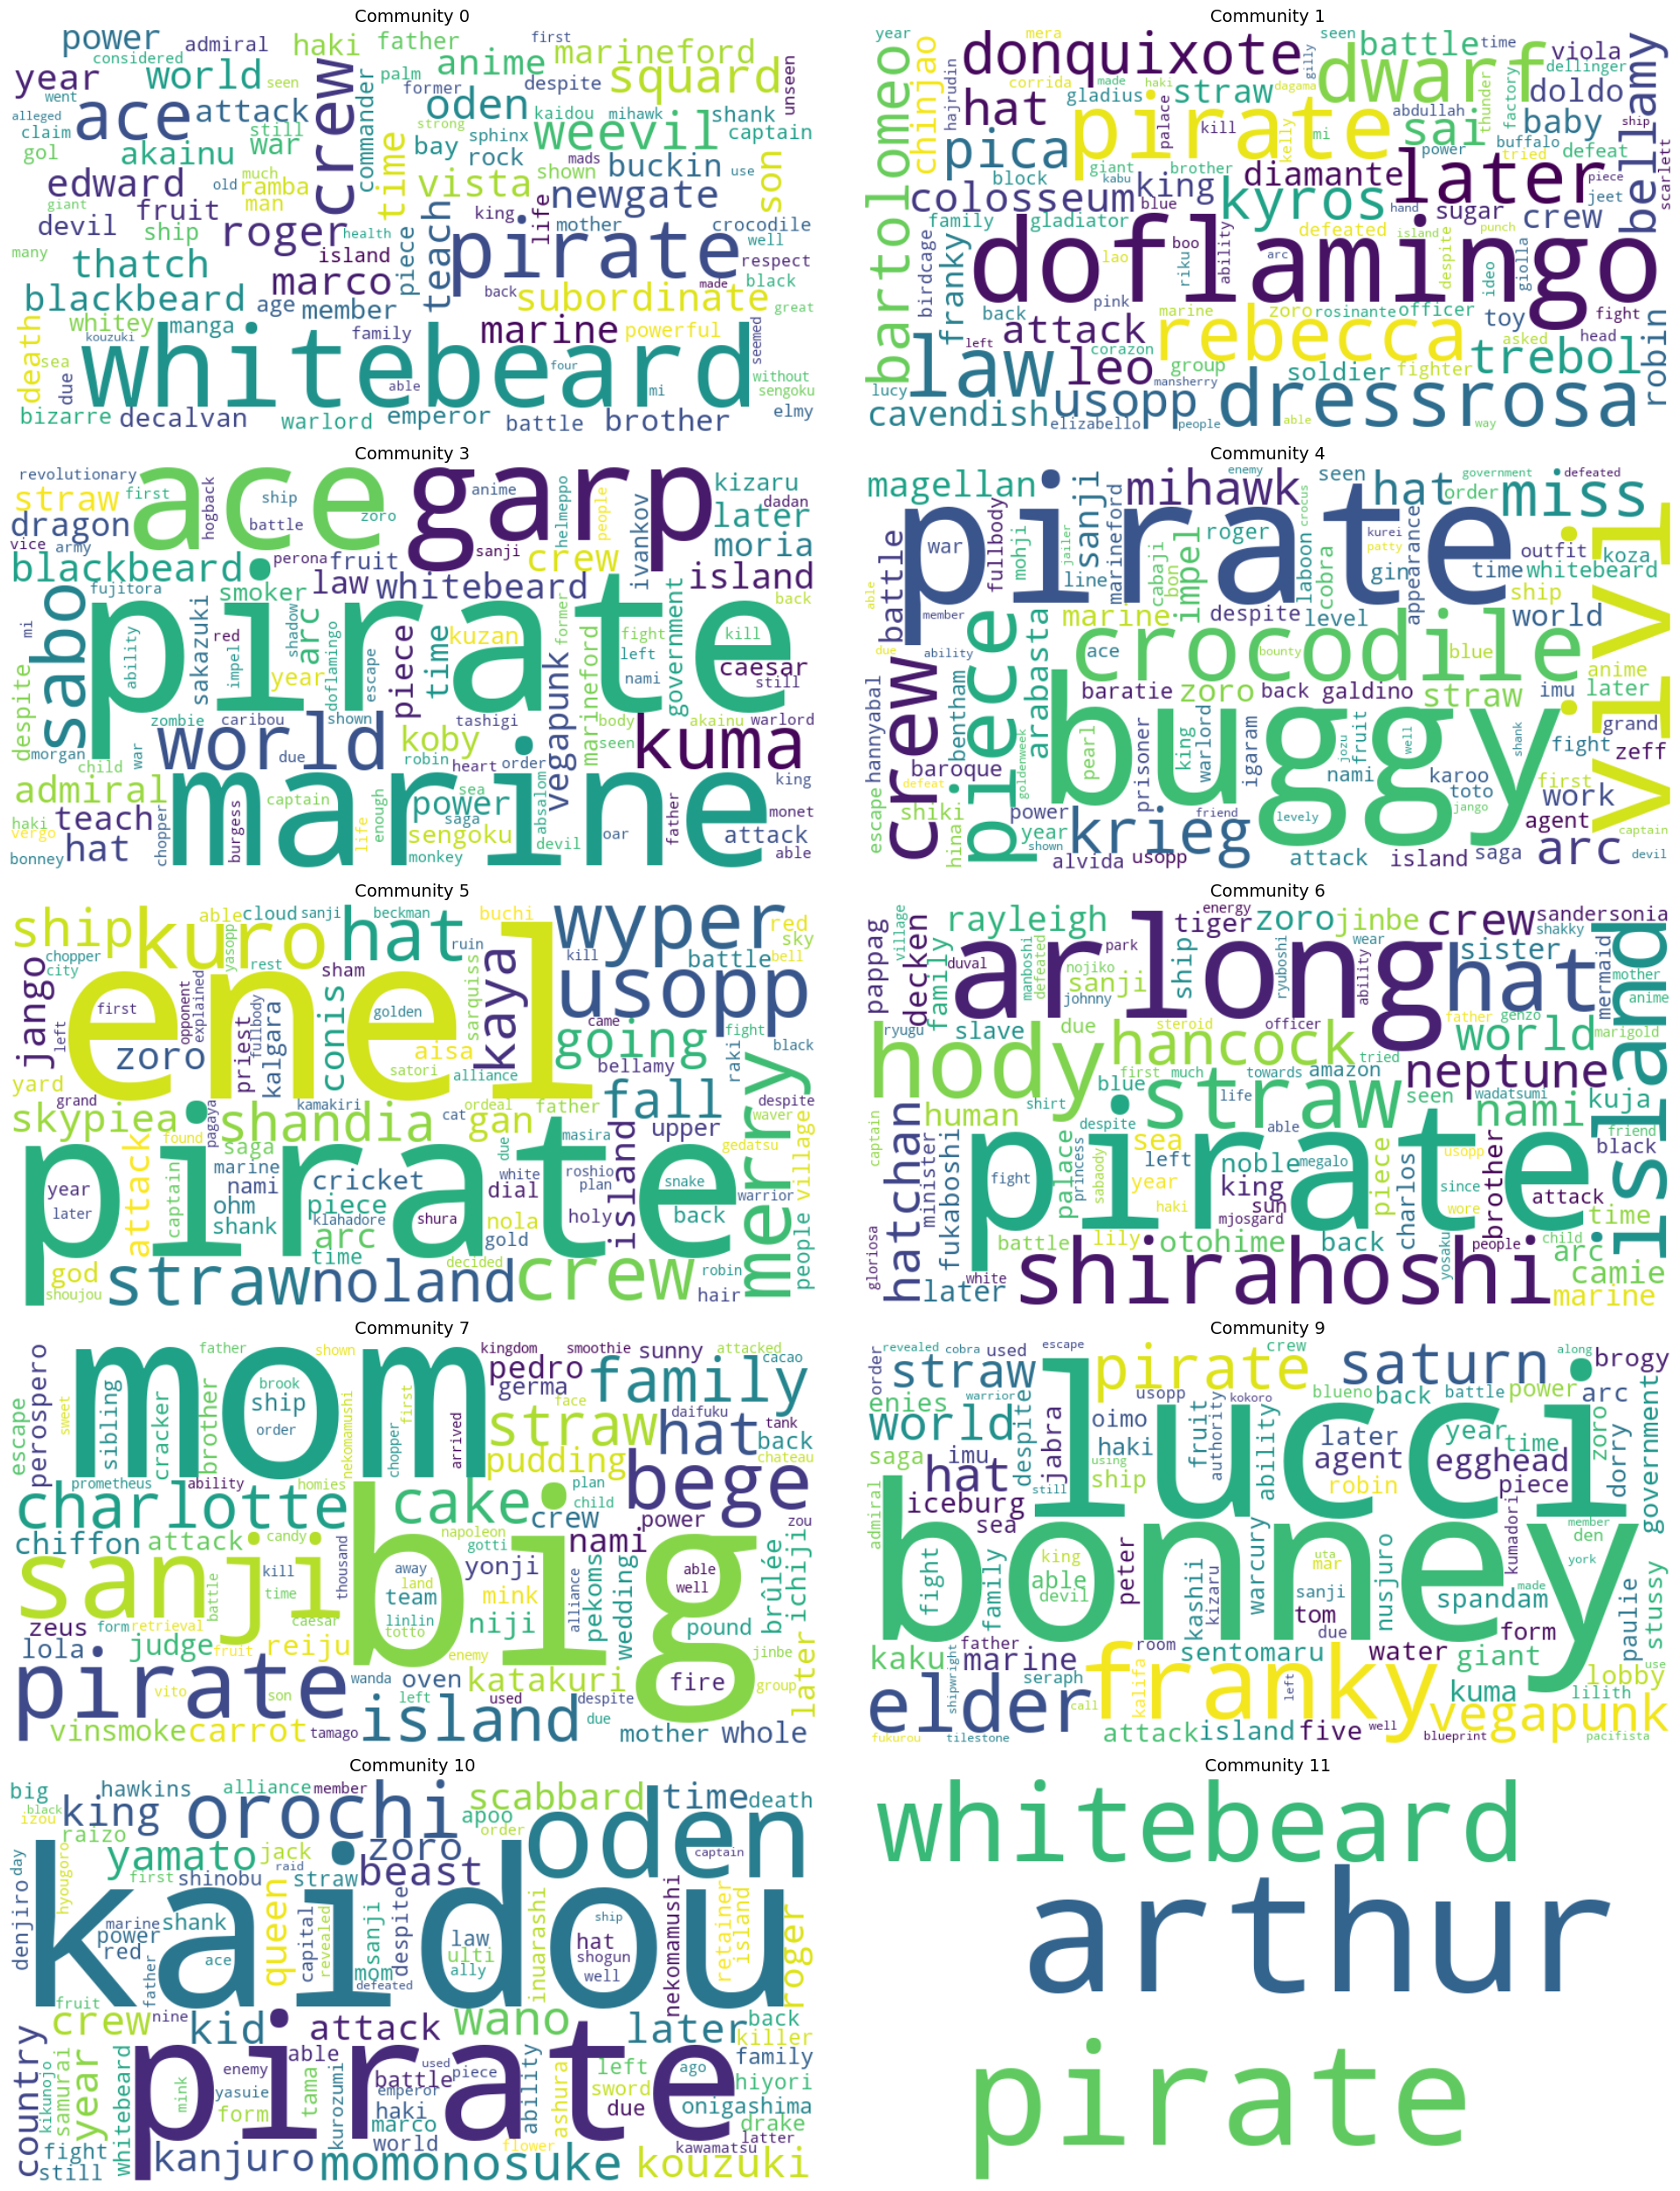

In [20]:
text_dir = r"./../onepiece_cleaned"  # Replace with your actual directory path

# Prepare content for each community
communities_content = {}
for community, members in communities_louvain.items():
    communities_content[community] = []
    for node in members:
        filename = os.path.join(text_dir, f"{node}.txt")
        if os.path.exists(filename):
            # Read and clean the content of each file
            with open(filename, 'r', encoding='utf-8') as file:
                raw_content = file.read()
                cleaned_content = " ".join(process_text(raw_content, lemmatize=True))
                communities_content[community].append(cleaned_content)

# Prepare word clouds for up to 10 communities
fig, axes = plt.subplots(5, 2, figsize=(20, 25))  # Create a 5x2 grid for subplots
axes = axes.flatten()

# Generate word clouds
for i, (community, contents) in enumerate(communities_content.items()):
    if i >= 10:  # Limit to 10 communities
        break
    
    # Merge all text content in the community
    merged_content = " ".join(contents)
    
    # Perform TF-IDF analysis
    vectorizer = TfidfVectorizer(max_features=100)  # Limit to top 100 features
    X = vectorizer.fit_transform([merged_content])
    tfidf_scores = dict(zip(vectorizer.get_feature_names_out(), X.toarray().flatten()))
    
    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(tfidf_scores)
    
    # Plot the word cloud in the corresponding subplot
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"Community {community}", fontsize=14)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [21]:
# Load the arcs JSON data
arcs_file_path = r'./../json_files/character_to_arcs.json'  # Replace with your actual file path
with open(arcs_file_path, 'r') as file:
    arcs_data = json.load(file)


**Analysis of frequency of arcs characters appearances in Communities**

In [22]:
import pandas as pd
from collections import defaultdict

# Compute arc statistics and prepare DataFrame data
def prepare_dataframe(communities, arcs_data):
    # Create a set of all arcs
    all_arcs = set(arc for arcs in arcs_data.values() for arc in arcs)

    # Dictionary to hold arc frequencies for each community
    community_arc_data = defaultdict(lambda: defaultdict(int))

    for community_id, nodes in communities:
        if len(nodes) < 6:
            continue  # Skip small communities

        for node in nodes:
            if node in arcs_data:
                for arc in arcs_data[node]:
                    community_arc_data[community_id][arc] += 1

    # Create the DataFrame
    df = pd.DataFrame(
        {community_id: {arc: community_arc_data[community_id].get(arc, 0) for arc in all_arcs} 
         for community_id in community_arc_data}
    ).fillna(0).astype(int)

    return df

# Create the DataFrame
df_arcs = prepare_dataframe(sorted_communities, arcs_data)

# Display the DataFrame
df_arcs

,3,10,7,1,4,6,9,5,13,0,14,16
Arlong Park Arc,2,2,0,0,2,17,0,3,0,0,0,0
Romance Dawn Arc,11,2,0,0,1,1,0,2,0,0,0,0
Loguetown Arc,9,4,1,1,8,5,0,8,0,0,0,0
Fish-Man Island Arc,7,5,5,0,1,31,6,1,1,0,1,0
Post-War Arc,42,12,0,2,20,17,6,3,1,7,0,1
Zou Arc,17,22,14,11,16,13,1,2,4,9,0,0
Wano Country Arc,52,84,31,9,19,25,23,5,2,2,0,6
Post Enies Lobby Arc,2,0,0,0,0,3,9,4,0,0,0,0
Water 7 Arc,3,1,1,0,2,3,20,4,1,0,0,0
Dressrosa Arc,26,25,10,61,3,5,12,3,1,0,0,0
